# 목차
<hr/>

<ol>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;">필요한 모듈 불러오기</i>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 1</span> : 데이터 준비하기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 데이터 Resize 하기
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 데이터 불러오기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> train_test_split 사용하여 랜덤하게 섞어 데이터셋 만들기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">4. </span> 데이터 정규화하기</li>
        </ul>
    </li><li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 2</span> : 딥러닝 네트워크 설계 및 모델 훈련하기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 딥러닝 네트워크 설계하기
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> 모델 훈련하기</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 3</span> : 테스트용 데이터 예측하기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> test 데이터 resize하기
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> test 데이터 불러오기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> 데이터 정규화하기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">4. </span> test 데이터 예측하기</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 4</span> : 데이터 추가하여 다시 해보기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> 데이터 다시 불러오기
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> train_test_split 사용하여 랜덤하게 섞어 데이터셋 만들기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> 데이터 전처리하기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">4. </span> 딥러닝 네트워크 설계 및 모델 훈련하기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">5. </span> 테스트 데이터 예측해보기</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;"><span style = "font-weight:bold;color:#0172d4;">STEP 5</span> : 완전히 새로운 데이터 세트 예측해보기</i>
        <ul style = "margin-top:10px; list-style:none;">
            <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">1. </span> new 데이터 resize하기
            </li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">2. </span> new 데이터 불러오기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> 데이터 정규화하기</li>
            <li style = "margin-bottom:5px;"><span style = "font-weight:bold;color:#0172d4;">3. </span> new 데이터 예측해보기</li>
        </ul>
    </li>
    <li style = "margin-bottom:30px; list-style: none;"><i style = "font-weight:bold;font-style: normal;">회고</i>
</ol>

<div style = "height: 50px;"><div/>

# 필요한 모듈 불러오기

In [46]:
import glob
import os
import random

import numpy             as np
import matplotlib.pyplot as plt
import tensorflow        as tf

from PIL                     import Image
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from tensorflow              import keras


<div style = "height: 50px;"><div/>

# <span style = "font-weight:bold;color:#0172d4;">STEP 1</span> : 데이터 준비하기

## 1. 데이터 Resize 하기
<hr/>

In [2]:
# 파일 28x28 사이즈로 변환해주는 함수
def resize_images(img_path):
    images = glob.glob(img_path + '/*.jpg')
    
    print(len(images), 'images to be resized.')
    
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)
    
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, 'JPEG')
        
    print(len(images), 'images resized.')

<div style = "height: 20px;"></div>

### scissor

In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = 'data/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

500 images to be resized.
500 images resized.
가위 이미지 resize 완료!


<div style = "height: 20px;"></div>

### rock

In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = 'data/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

500 images to be resized.
500 images resized.
바위 이미지 resize 완료!


<div style = "height: 20px;"></div>

### paper

In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = 'data/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

500 images to be resized.
500 images resized.
보 이미지 resize 완료!


<div style = "height: 50px;"><div/>

## 2. 데이터 불러오기
<hr/>

In [6]:
import numpy as np

def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color,dtype = np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data,dtype = np.int32)

    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype = np.int32)
        imgs[idx,:,:,:] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0   # 가위 : 0
        idx = idx + 1

    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file),dtype = np.int32)
        imgs[idx,:,:,:] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = 'data'
(data, target)=load_data(image_dir_path, 1500)
data_norm = data/255.0   # 입력은 0~1 사이의 값으로 정규화

print("data shape: {}".format(data.shape))
print("target shape: {}".format(target.shape))

데이터의 이미지 개수는 1500 입니다.
data shape: (1500, 28, 28, 3)
target shape: (1500,)


<div style = "height: 25px;"></div>

### 확인하기

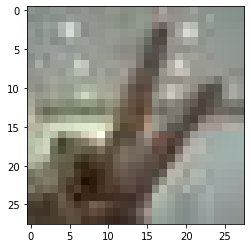

In [7]:
plt.imshow(data[0])

In [8]:
print('라벨 : ', target[0])

라벨 :  0


In [9]:
data.shape

(1500, 28, 28, 3)

In [10]:
target.shape

(1500,)

<div style = "height: 50px;"></div>

## 2. train_test_split 사용하여 랜덤하게 섞어 데이터셋 만들기
<hr/>

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42)

### 확인하기

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1200, 28, 28, 3)
(1200,)
(300, 28, 28, 3)
(300,)


<div style = "height: 50px;"></div>

## 3. 데이터 정규화하기
<hr/>

In [13]:
print('최솟값 : ', np.min(x_train), '최댓값 : ', np.max(x_train))

최솟값 :  0 최댓값 :  255


In [14]:
# 입력은 0~1 사이의 값으로 정규화
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

In [15]:
print('최솟값 : ', np.min(x_train_norm), '최댓값 : ', np.max(x_train_norm))

최솟값 :  0.0 최댓값 :  1.0


<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 2</span> : 딥러닝 네트워크 설계 및 모델 훈련하기

## 1. 딥러닝 네트워크 설계하기
<hr/>

In [47]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1 = 16
n_channel_2 = 32
n_dense = 32
n_train_epoch = 30

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation = 'relu', input_shape = (28, 28, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

In [17]:
model.summary()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

<div style = "height: 50px;"></div>

## 2. 모델 훈련하기
<hr/>

In [18]:
history = model.fit(x_train_norm, 
                    y_train,
                    epochs = n_train_epoch,
                    validation_data = (x_test_norm, y_test))

Epoch 1/30
38/38 [==============================] - 1s 8ms/step - loss: 1.0897 - accuracy: 0.3908 - val_loss: 1.0620 - val_accuracy: 0.5100
Epoch 2/30
38/38 [==============================] - 0s 5ms/step - loss: 0.9892 - accuracy: 0.5958 - val_loss: 0.9526 - val_accuracy: 0.4900
Epoch 3/30
38/38 [==============================] - 0s 5ms/step - loss: 0.7862 - accuracy: 0.6858 - val_loss: 0.7125 - val_accuracy: 0.6900
Epoch 4/30
38/38 [==============================] - 0s 5ms/step - loss: 0.6305 - accuracy: 0.7483 - val_loss: 0.5598 - val_accuracy: 0.7700
Epoch 5/30
38/38 [==============================] - 0s 5ms/step - loss: 0.4823 - accuracy: 0.8067 - val_loss: 0.4641 - val_accuracy: 0.8167
Epoch 6/30
38/38 [==============================] - 0s 5ms/step - loss: 0.3899 - accuracy: 0.8567 - val_loss: 0.4285 - val_accuracy: 0.8033
Epoch 7/30
38/38 [==============================] - 0s 5ms/step - loss: 0.3492 - accuracy: 0.8708 - val_loss: 0.3277 - val_accuracy: 0.8767
Epoch 8/30
38/38 [==

<div style = "height: 25px;"></div>

### 그래프 출력해보기

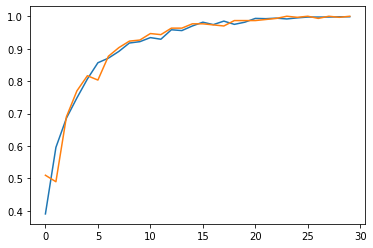

In [21]:
# 에포크에 따른 정확도를 그래프로 나타내보기
plt.plot(history.epoch, history.history["accuracy"])
plt.plot(history.epoch, history.history["val_accuracy"])
plt.show()

<p style= "font-size:15px; line-height:24px;">결과를 출력해본 결과, 정확도가 100이 나왔다. 그렇다는 뜻은 모델이 과적합(overfitting)일 수도 있으므로, 테스트용 데이터를 예측해보고 확인할 것이다.</p>

> <ul>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">훈련 데이터</span> : loss: 5.2633e-04 - accuracy: 1.0000 </li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">검증 데이터</span> : val_loss: 0.0022 - val_accuracy: 1.0000</li>
</ul>

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 3</span> : 테스트용 데이터 예측하기

## 1. test 데이터 resize하기
<hr/>

In [22]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = 'data/test/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

152 images to be resized.
152 images resized.
가위 이미지 resize 완료!


In [23]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = 'data/test/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

134 images to be resized.
134 images resized.
바위 이미지 resize 완료!


In [24]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = 'data/test/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

90 images to be resized.
90 images resized.
보 이미지 resize 완료!


<div style = "height: 50px;"></div>

## 2. test 데이터 불러오기
<hr/>

In [25]:
image_dir_path = 'data/test'
x_test, y_test = load_data(image_dir_path, 376)

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

데이터의 이미지 개수는 376 입니다.
x_test shape: (376, 28, 28, 3)
y_test shape: (376,)


<div style = "height: 50px;"></div>

## 3. 데이터 정규화하기
<hr/>

In [26]:
# 입력은 0~1 사이의 값으로 정규화
x_test_norm = x_test / 255.0   

<div style = "height: 50px;"></div>

## 4. test 데이터 예측하기
<hr/>

In [27]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

12/12 - 0s - loss: 3.6746 - accuracy: 0.5186 - 29ms/epoch - 2ms/step
test_loss : 3.6745734214782715
test_accuracy : 0.5186170339584351


<p style= "font-size:15px; line-height:24px;"><span style = 'background-color:#fff5b1; padding:0.2px;'>정확도는 약 52%</span>가 나왔다.<br/>
과적합 되었다는 예상대로, test의 데이터는 잘 예측하지 못하는 결과가 나왔다.<br/>
따라서, 데이터 개수를 늘리고, 파라미터를 조정하여 정확도를 높일 것이다.</p>

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 4</span> : 데이터 추가하여 다시 해보기

## 1. 데이터 다시 불러오기
<hr/>

In [28]:
image_dir_path = 'data2'
(data, target) =load_data(image_dir_path, 3582)

print("data shape: {}".format(data.shape))

데이터의 이미지 개수는 3582 입니다.
data shape: (3582, 28, 28, 3)


<div style = "height: 50px;"></div>

## 2. train_test_split 사용하여 랜덤하게 섞어 데이터셋 만들기
<hr/>

In [29]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42)

### 확인하기

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2865, 28, 28, 3)
(2865,)
(717, 28, 28, 3)
(717,)


<div style = "height: 50px;"></div>

## 3. 데이터 전처리하기
<hr/>

In [31]:
# 입력은 0~1 사이의 값으로 정규화
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

<div style = "height: 50px;"></div>

## 4. 딥러닝 네트워크 설계 및 모델 훈련하기
<hr/>

In [32]:
n_channel_1 = 32
n_channel_2 = 64
n_dense = 128
n_train_epoch = 30

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation = 'relu', input_shape = (28, 28, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = 'relu'))
model.add(keras.layers.Dense(3, activation = 'softmax'))

In [33]:
model.summary()
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [34]:
model.fit(x_train_norm, y_train, epochs = n_train_epoch)

Epoch 1/30
90/90 [==============================] - 1s 6ms/step - loss: 0.9867 - accuracy: 0.5372
Epoch 2/30
90/90 [==============================] - 1s 6ms/step - loss: 0.5445 - accuracy: 0.7906
Epoch 3/30
90/90 [==============================] - 1s 6ms/step - loss: 0.3042 - accuracy: 0.8925
Epoch 4/30
90/90 [==============================] - 1s 7ms/step - loss: 0.1971 - accuracy: 0.9319
Epoch 5/30
90/90 [==============================] - 1s 7ms/step - loss: 0.1446 - accuracy: 0.9578
Epoch 6/30
90/90 [==============================] - 1s 8ms/step - loss: 0.1147 - accuracy: 0.9665
Epoch 7/30
90/90 [==============================] - 1s 8ms/step - loss: 0.0881 - accuracy: 0.9752
Epoch 8/30
90/90 [==============================] - 1s 7ms/step - loss: 0.0614 - accuracy: 0.9836
Epoch 9/30
90/90 [==============================] - 1s 7ms/step - loss: 0.0546 - accuracy: 0.9836
Epoch 10/30
90/90 [==============================] - 1s 7ms/step - loss: 0.0352 - accuracy: 0.9920
Epoch 11/30
90/90 [

<div style = "height: 50px;"></div>

## 5. 테스트 데이터 예측해보기
<hr/>

In [35]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

23/23 - 0s - loss: 0.0554 - accuracy: 0.9833 - 225ms/epoch - 10ms/step
test_loss : 0.055437371134757996
test_accuracy : 0.9832636117935181


<p style= "font-size:15px; line-height:24px;">다양한 데이터로 다시 모델을 훈련시킨 결과 <span style = 'background-color:#fff5b1; padding:0.2px;'>정확도가 약 98%</span>가 나왔다.<br/>
테스트 데이터를 잘 예측하는 것을 확인했으므로, 완전히 새로운 데이터를 주어 예측하고자 한다.</p>

<div style = "height: 50px;"></div>

# <span style = "font-weight:bold;color:#0172d4;">STEP 5</span> : 완전히 새로운 데이터 세트 예측해보기

## 1. new 데이터 resize하기
<hr/>

In [36]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = 'data2/test3/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

123 images to be resized.
123 images resized.
가위 이미지 resize 완료!


In [37]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = 'data2/test3/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

123 images to be resized.
123 images resized.
바위 이미지 resize 완료!


In [38]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = 'data2/test3/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

124 images to be resized.
124 images resized.
보 이미지 resize 완료!


<div style = "height: 50px;"></div>

## 2. new 데이터 불러오기
<hr/>

In [39]:
image_dir_path = 'data2/test3'
x_new, y_new = load_data(image_dir_path, 1274)

print("x_new shape: {}".format(x_new.shape))
print("y_new shape: {}".format(y_new.shape))

데이터의 이미지 개수는 370 입니다.
x_new shape: (1274, 28, 28, 3)
y_new shape: (1274,)


<div style = "height: 25px;"></div>

### 확인해보기

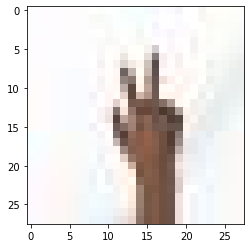

In [40]:
plt.imshow(x_new[0])
plt.show()

In [41]:
print('라벨 : ', y_new[0])

라벨 :  0


<div style = "height: 50px;"></div>

## 3. 데이터 정규화하기
<hr/>

In [42]:
x_new_norm = x_new / 255.0   # 입력은 0~1 사이의 값으로 정규화

<div style = "height: 50px;"></div>

## 4. new 데이터 예측해보기
<hr/>

In [43]:
test_loss, test_accuracy = model.evaluate(x_new_norm, y_new, verbose = 2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

40/40 - 0s - loss: 1.3573 - accuracy: 0.8799 - 87ms/epoch - 2ms/step
test_loss : 1.3572821617126465
test_accuracy : 0.8799058198928833


<p style= "font-size:15px; line-height:24px;">모델의 훈련에 들어가지 않은, 완전히 새로운 데이터를 예측해보았더니 <span style = 'background-color:#fff5b1; padding:0.2px;'>정확도가 약 88%</span>인 것을 확인할 수 있었다.</p>

<div style = "height: 50px;"></div>

## 회고
<hr/>

### 실패

<p style= "font-size:16px; line-height:30px;">처음, 스스로 사진을 찍어 데이터 세트를 만든 후, 다른 사람의 데이터를 예측한 결과, 전혀 예측하지 못하는 결과를 초래했습니다. <br/>
처음에는 데이터의 양이 문제인줄 알고 사진을 더 찍어 데이터 개수를 늘리거나 에포크 횟수를 늘려 진행을 했으나, 문제가 해결되지 않았습니다.<br/>
데이터를 imshow()하여 출력해본 결과, 다른 사람의 데이터 셋이 다양했고, 스스로 찍은 사진은 다양하지 못한 것을 확인했습니다. (나라는 사람이 편향되었구나.. 라고 생각했습니다.)</p>

#### 문제의 데이터 셋

<img src = "data/scissor/01.jpg" style = "width:30%; float:left; margin-right:10%;">
<img src = "data/test/scissor/0.jpg" style = "width:30%; float:left; margin-top:0px;">

<div style = "height: 25px;"></div>

### 성공

<p style= "font-size:16px; line-height:30px;">따라서, 다양한 데이터의 수집을 위해서 아이펠 노션 페이지에 <span style = 'background-color:#fff5b1; padding:0.2px;'>가위바위보!!! 데이터 공유</span> 페이지를 만들어 사람들에게 데이터 공유를 하자고 했습니다.<br/>
감사하게도, 많은 분들께서 데이터 세트를 공유해주셨고, 덕분에 다양하고 많은 데이터로 모델을 학습 시킬 수 있었습니다.</p><br/><br/>
<p style= "font-size:16px; line-height:30px;">데이터 세트 추가 및 파라미터를 조정하지 않고 훈련한 모델의 결과</p> 


> <ul style = "font-size:16px;">
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">test_loss</span> : 3.6745734214782715</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">test_accuracy</span> : 0.5186170339584351</li>
</ul>
<br/><br/>

<p style= "font-size:16px; line-height:30px;">데이터 추가 및 파라미터를 조정한 모델의 훈련 결과</p> 

> <ul style = "font-size:16px;">
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">test_loss</span> : 1.3572821617126465</li>
    <li style = "margin-bottom:3px;"><span style = "font-weight:bold;color:#0172d4;">test_accuracy</span> : 0.8799058198928833</li>
</ul>


#### 사진

<img src = "img/아지트공지.png">